In [2]:
import cv2

# Define the path of the input video file
video_path_main = "data1.avi"

# Create a VideoCapture object to read the video file
cap = cv2.VideoCapture(video_path_main )

# Initialize an empty list to store the extracted frames
frames = []

# Loop through the video frames and extract each frame
while True:
    # Read the next frame from the video
    ret, frame = cap.read()

    # If there are no more frames, break the loop
    if not ret:
        break

    # Append the frame to the list of frames
    frames.append(frame)

# Release the VideoCapture object
cap.release()

# Set the output to be the extracted frames
step1_output = frames
print(len(step1_output))


1205


In [3]:
import cv2
import mediapipe as mp

# Load the MediaPipe face detection model
mp_face_detection = mp.solutions.face_detection.FaceDetection()

# Define the path of the input video file
video_path = video_path_main

# Create a VideoCapture object to read the video file
cap = cv2.VideoCapture(video_path)

# Initialize an empty list to store the detected faces
detected_faces = []

# Loop through the video frames and detect faces in each frame
while True:
    # Read the next frame from the video
    ret, frame = cap.read()

    # If there are no more frames, break the loop
    if not ret:
        break

    # Convert the frame to RGB color space
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Use MediaPipe face detection model to detect faces in the frame
    results = mp_face_detection.process(frame_rgb)

    # If faces are detected in the frame, save the bounding boxes of the faces
    if results.detections:
        for detection in results.detections:
            bbox = detection.location_data.relative_bounding_box
            height, width, _ = frame.shape
            xmin = int(bbox.xmin * width)
            ymin = int(bbox.ymin * height)
            xmax = int((bbox.xmin + bbox.width) * width)
            ymax = int((bbox.ymin + bbox.height) * height)
            detected_faces.append((frame, (xmin, ymin, xmax, ymax)))

    # # Show the detected faces in some frames
    # if len(detected_faces) > 0:
    #     if len(detected_faces) % 50 == 0: # Show detected faces every 50 frames
    #         for i, (frame, bbox) in enumerate(detected_faces):
    #             xmin, ymin, xmax, ymax = bbox
    #             cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    #             cv2.imshow("Detected faces", frame)
    #             cv2.waitKey(1)

# Release the VideoCapture object
cap.release()

# Set the output to be the detected faces
step2_output = detected_faces
print(step2_output)


[(array([[[125, 130, 107],
        [125, 130, 107],
        [125, 130, 107],
        ...,
        [104, 125, 117],
        [104, 125, 117],
        [104, 125, 117]],

       [[125, 130, 107],
        [125, 130, 107],
        [125, 130, 107],
        ...,
        [104, 125, 117],
        [104, 125, 117],
        [104, 125, 117]],

       [[125, 130, 107],
        [125, 130, 107],
        [125, 130, 107],
        ...,
        [104, 125, 117],
        [104, 125, 117],
        [104, 125, 117]],

       ...,

       [[ 43,  40,  39],
        [ 43,  40,  39],
        [ 43,  40,  39],
        ...,
        [ 23,  32,  33],
        [ 23,  32,  33],
        [ 23,  32,  33]],

       [[ 43,  40,  41],
        [ 43,  40,  41],
        [ 43,  40,  41],
        ...,
        [ 20,  29,  30],
        [ 20,  29,  30],
        [ 20,  29,  30]],

       [[ 43,  40,  41],
        [ 43,  40,  41],
        [ 43,  40,  41],
        ...,
        [ 18,  27,  28],
        [ 18,  27,  28],
        [ 18,  27,  28

In [4]:
# Define the size of the ROI region
roi_size = (80, 80)

# Define the path of the input video file
video_path = video_path_main

# Create a VideoCapture object to read the video file
cap = cv2.VideoCapture(video_path)

# Initialize an empty list to store the ROI regions
roi_regions = []

# Loop through the detected faces and select the ROI region for each face
for i, (frame, bbox) in enumerate(step2_output):
    xmin, ymin, xmax, ymax = bbox

    # Calculate the center point of the face
    center_x = int((xmin + xmax) / 2)
    center_y = int((ymin + ymax) / 2)

    # Calculate the coordinates of the ROI region
    roi_xmin = center_x - int(roi_size[0] / 2)
    roi_ymin = center_y - int(roi_size[1] / 2)
    roi_xmax = roi_xmin + roi_size[0]
    roi_ymax = roi_ymin + roi_size[1]

    # # Draw a rectangle around the face and ROI region for some frames
    # if i % 50 == 0: # Draw rectangles every 50 frames
    #     cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    #     cv2.rectangle(frame, (roi_xmin, roi_ymin), (roi_xmax, roi_ymax), (0, 0, 255), 2)
    #     cv2.imshow("ROI Selection", frame)
    #     cv2.waitKey(1)

    # Extract the ROI region from the frame and resize it to the desired size
    roi_region = frame[roi_ymin:roi_ymax, roi_xmin:roi_xmax]
    roi_region = cv2.resize(roi_region, roi_size)

    # Append the ROI region to the list of ROI regions
    roi_regions.append(roi_region)

# Release the VideoCapture object
cap.release()

# Set the output to be the ROI regions
step3_output = roi_regions
print(step3_output)


[array([[[ 65,  68,  93],
        [ 46,  49,  74],
        [ 42,  45,  70],
        ...,
        [  1,   4,  15],
        [  9,  12,  23],
        [ 13,  16,  27]],

       [[ 64,  67,  92],
        [ 51,  54,  79],
        [ 43,  46,  71],
        ...,
        [  0,   2,  13],
        [  5,   8,  19],
        [  9,  12,  23]],

       [[ 81,  77, 103],
        [ 70,  66,  92],
        [ 71,  67,  93],
        ...,
        [  8,  23,  60],
        [  5,  20,  57],
        [  2,  17,  54]],

       ...,

       [[ 69,  67,  79],
        [ 62,  60,  72],
        [ 62,  60,  72],
        ...,
        [ 22,  38,  65],
        [ 18,  34,  61],
        [ 15,  31,  58]],

       [[ 68,  66,  78],
        [ 62,  60,  72],
        [ 62,  60,  72],
        ...,
        [ 22,  38,  65],
        [ 18,  34,  61],
        [ 15,  31,  58]],

       [[ 68,  66,  78],
        [ 62,  60,  72],
        [ 62,  60,  72],
        ...,
        [ 22,  38,  65],
        [ 18,  34,  61],
        [ 15,  31,  58]

In [5]:
import torch
import torchvision.models as models
import torchvision
import torchvision.transforms as transforms

resnet18 = torchvision.models.resnet18( )
# Define the ResNet18 model
# resnet18 = models.resnet18(weights= ResNet18_Weights.DEFAULT)

# Remove the last layer of the ResNet18 model
modules = list(resnet18.children())[:-1]
resnet18 = torch.nn.Sequential(*modules)

# Set the ResNet18 model to evaluation mode
resnet18.eval()

# Define the transform to apply to the ROI regions
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Initialize an empty list to store the features
features = []

# Loop through the ROI regions and extract features using the ResNet18 model
for roi_region in step3_output:
    # Apply the transform to the ROI region
    roi_tensor = transform(roi_region).unsqueeze(0)

    # Pass the ROI tensor through the ResNet18 model
    with torch.no_grad():
        features_tensor = resnet18(roi_tensor).squeeze()

    # print(features_tensor.shape)  answer = 512
    # Append the features to the list of features
    features.append(features_tensor)

# Concatenate the features across frames to create a spatial-temporal representation
spatial_temporal_map = torch.stack(features, dim=0)

# Set the output to be the spatial-temporal representation
step4_output = spatial_temporal_map
print(step4_output)
print(step4_output.shape)


tensor([[0.5982, 0.4073, 1.0603,  ..., 0.0000, 0.6719, 0.0383],
        [0.5885, 0.4094, 1.0284,  ..., 0.0000, 0.6682, 0.0373],
        [0.5970, 0.4109, 1.0143,  ..., 0.0000, 0.6777, 0.0318],
        ...,
        [0.6312, 0.4368, 1.0477,  ..., 0.0000, 0.7047, 0.0485],
        [0.6291, 0.4360, 1.0489,  ..., 0.0000, 0.7054, 0.0482],
        [0.6303, 0.4368, 1.0497,  ..., 0.0000, 0.7046, 0.0479]])
torch.Size([1205, 512])


In [25]:
#output from 14th layer of resnet 18

resnet18 = torchvision.models.resnet18()

# Remove the last layer of the ResNet18 model
modules = list(resnet18.children())[: -4]   # Select up to the 16th layer
resnet18 = torch.nn.Sequential(*modules)

# Set the ResNet18 model to evaluation mode
resnet18.eval()

# Define the transform to apply to the ROI regions
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Initialize an empty list to store the features
features = []

# Loop through the ROI regions and extract features using the ResNet18 model
for roi_region in step3_output:
    # Apply the transform to the ROI region
    roi_tensor = transform(roi_region).unsqueeze(0)

    # Pass the ROI tensor through the ResNet18 model
    with torch.no_grad():
        features_tensor = resnet18(roi_tensor).squeeze()

    # Append the features to the list of features
    features.append(features_tensor)

print(features)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
import numpy
print(features[0].shape)
print(len(features))
array = numpy.array(features)
print(array.shape)

torch.Size([128, 10, 10])
1205
(1205,)


C:\Users\mojta\AppData\Local\Temp\ipykernel_70816\3782762418.py:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.array(features)
C:\Users\mojta\AppData\Local\Temp\ipykernel_70816\3782762418.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.array(features)


In [27]:
import torch


list_of_tensors = features

# Stack the list of tensors into a single 4D tensor
stacked_tensor = torch.stack(list_of_tensors)

# Print the shape of the stacked tensor
print(stacked_tensor.shape)  # Output: torch.Size([3, 3, 4, 5])
# print(stacked_tensor)

torch.Size([1205, 128, 10, 10])


In [28]:
print(stacked_tensor.shape[1])

128


In [31]:
import torch
import torch.nn as nn

num_channels = stacked_tensor.shape[1]  #(num_frames, num_channels, height, width)


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=num_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = self.flatten(x)

        flattened_features = x

        return flattened_features

conv_net = ConvNet()
stacked_tensor = stacked_tensor
flattened_features = conv_net(stacked_tensor)
print(flattened_features.shape)

torch.Size([1205, 128])


In [ ]:
HR = [84,71,70,76,73,63,61,72,75,84,67,73,68,86,91,60,64,81,69,74,83,61,83,95,90,88,66,69,96,58,56,61,76,62,88,92,63,64,60,64]
# print(len(HR))


In [ ]:
import torch
import torch.nn as nn

class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMNet, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

# Define hyperparameters
input_size = flattened_features.shape[1]
hidden_size = 64
num_layers = 1
output_size = 1

# Create LSTM model
lstm_net = LSTMNet(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_net.parameters(), lr=0.001)

# Train the model on your dataset
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(len(dataset)):
        # Get input and target tensors for current sample
        input_tensor = dataset[i]["features"]
        target_tensor = dataset[i]["label"]

        # Forward pass
        output_tensor = lstm_net(input_tensor)
        loss = criterion(output_tensor, target_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: {}/{} Loss: {:.6f}".format(epoch+1, num_epochs, loss.item()))


In [351]:
#Using PCA

import numpy as np
from sklearn.decomposition import PCA

# load the spatial-temporal feature maps generated in step 4
spatial_temporal_map = step4_output

# preprocess the spatial-temporal maps by normalizing pixel values
# normalized_maps = []
# for i in range(spatial_temporal_map.shape[0]):
#     map_i = spatial_temporal_map[i]
#     map_i = (map_i - np.mean(map_i)) / np.std(map_i)
#     normalized_maps.append(map_i)
# normalized_maps = np.array(normalized_maps)

# reshape the normalized maps to prepare them for PCA
reshaped_maps = spatial_temporal_map.reshape(spatial_temporal_map.shape[0], -1)

# apply PCA to the reshaped maps to extract RPPG signals
pca = PCA(n_components=1)
rppg_signals = pca.fit_transform(reshaped_maps)

# print('Extracted RPPG signals:', rppg_signals)
# print(rppg_signals.shape)
step5_output = rppg_signals

import scipy.signal as signal


# Define the band-pass filter parameters
fs = 20  # sampling rate
lowcut = 0.7 # lower cutoff frequency (Hz) 0.7
highcut = 4  # higher cutoff frequency (Hz)  4

# Define the filter coefficients
b, a = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], 'band')

# Filter the RPPG signals using the band-pass filter
filtered_signals = signal.filtfilt(b, a, step5_output.flatten())

# Apply baseline drift correction using detrend function
processed_signals = signal.detrend(filtered_signals)

# Save the processed signals in a variable named "step6_output"
step6_output = processed_signals.reshape(-1, 1)
# print(step6_output)
# print(step6_output.shape)

import numpy as np
from scipy.fft import fft, fftfreq

# Define sampling rate
fs = 20 # assuming 20 frames per second

# Compute power spectral density using FFT
freqs = fftfreq(step6_output.shape[0], 1/fs)
fft_vals = fft(step6_output[:, 0])
psd = np.abs(fft_vals) ** 2

# Find the peak frequency in the power spectral density
max_idx = np.argmax(psd)
hr = freqs[max_idx] * 60

# Print estimated heart rate
print("Estimated heart rate PCA: {:.2f} bpm".format(hr))

# Save output in a variable
step7_output = hr


Estimated heart rate PCA: 69.12 bpm


In [352]:
# Using ICA

import numpy as np
from scipy.signal import butter, lfilter, find_peaks
from sklearn.decomposition import FastICA

# Step 1: Load the spatial-temporal maps data
feature_maps = spatial_temporal_map  # Replace with your data

# Step 2: Extract RPPG signals using Independent Component Analysis (ICA)
ica = FastICA(n_components=3, random_state=0)  # Choose the number of components as per your requirement
rppg_signals = ica.fit_transform(feature_maps.T)

# Step 3: Filter and process the RPPG signals using band-pass filtering
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 20  # Sampling frequency
lowcut = 0.7  # Lower cutoff frequency in Hz 0.5
highcut = 3  # Higher cutoff frequency in Hz 4.0

rppg_filtered = np.zeros_like(rppg_signals)
for i in range(rppg_signals.shape[1]):
    rppg_filtered[:, i] = butter_bandpass_filter(rppg_signals[:, i], lowcut, highcut, fs, order=4)

# Step 4: Estimate the Heart Rate (HR) from the processed RPPG signals
fft_rppg = np.abs(np.fft.fft(rppg_filtered, axis=0))
freqs = np.fft.fftfreq(rppg_filtered.shape[0], 1/fs)
max_freqs_idx = np.argmax(fft_rppg[(freqs > 0.5) & (freqs < 4.0), :], axis=0)
hr = freqs[max_freqs_idx]

# Step 5: Calculate the output (BMP)
BMP = np.mean(hr) * 60  # Assuming HR is in beats per minute
print("ICA",BMP)


ICA 57.8125


C:\Users\mojta\anaconda3\envs\cudatest\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [171]:
real_index = []
for i in range (1,41):
    j= str(i)
    index = 'data'+ j +'.hdf5'
    # print(index)
    real_index.append(index)

print(real_index)

['data1.hdf5', 'data2.hdf5', 'data3.hdf5', 'data4.hdf5', 'data5.hdf5', 'data6.hdf5', 'data7.hdf5', 'data8.hdf5', 'data9.hdf5', 'data10.hdf5', 'data11.hdf5', 'data12.hdf5', 'data13.hdf5', 'data14.hdf5', 'data15.hdf5', 'data16.hdf5', 'data17.hdf5', 'data18.hdf5', 'data19.hdf5', 'data20.hdf5', 'data21.hdf5', 'data22.hdf5', 'data23.hdf5', 'data24.hdf5', 'data25.hdf5', 'data26.hdf5', 'data27.hdf5', 'data28.hdf5', 'data29.hdf5', 'data30.hdf5', 'data31.hdf5', 'data32.hdf5', 'data33.hdf5', 'data34.hdf5', 'data35.hdf5', 'data36.hdf5', 'data37.hdf5', 'data38.hdf5', 'data39.hdf5', 'data40.hdf5']


In [172]:
# final code for ground truth data

import h5py
from scipy import signal


final_HR = []

for i in real_index:
    with h5py.File(i, 'r') as f:
        original_pulse = f['pulse'][:]

    # print(original_pulse.shape)
    total_samples = original_pulse.shape[0]
    # print(total_samples)

    import numpy as np
    # from scipy import signal

    # Define parameters
    window_size = 60 # seconds
    sampling_rate = total_samples / 60 # Hz
    total_samples = total_samples
    overlap = 5 # seconds
    low_freq = 8 # Hz
    high_freq = 20 # Hz

    # Define bandpass filter
    nyquist_freq = 0.5 * sampling_rate
    low = low_freq / nyquist_freq
    high = high_freq / nyquist_freq
    b, a = signal.butter(4, [low, high], btype='band')

    # Apply Pan-Tompkins algorithm to identify peaks
    # The output of this line of code is an array of indices that correspond to the R-peaks in the ECG signal.
    qrs_indices = signal.find_peaks(signal.detrend(original_pulse), distance=0.5*sampling_rate)[0]
    # distance=0.3*sampling_rate sets the minimum distance (in samples) between two consecutive peaks to be 0.3 times the sampling rate. This parameter helps to filter out spurious peaks that may occur due to noise or other artifacts.

    # Calculate heart rate in beats per minute
    num_beats = len(qrs_indices)
    # duration = total_samples / sampling_rate
    # heart_rate = num_beats / duration * 60
    # print(num_beats, duration, heart_rate )
    # Save and print output

    original_HR = num_beats
    final_HR.append(original_HR)


print(final_HR)
print(len(final_HR))

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data1.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [1]:
import pandas as pd
import numpy as np
final_HR = np.array(final_HR)
## convert your array into a dataframe
df = pd.DataFrame (final_HR)

## save to xlsx file



df.to_excel('final_HR.xlsx')

NameError: name 'final_HR' is not defined

In [2]:
import numpy as np
from scipy import signal

# Define parameters
window_size = 60 # seconds
sampling_rate = total_samples / 60 # Hz
total_samples = total_samples
overlap = 5 # seconds
low_freq = 8 # Hz
high_freq = 20 # Hz

# Define bandpass filter
nyquist_freq = 0.5 * sampling_rate
low = low_freq / nyquist_freq
high = high_freq / nyquist_freq
b, a = signal.butter(4, [low, high], btype='band')

# Apply Pan-Tompkins algorithm to identify peaks
# The output of this line of code is an array of indices that correspond to the R-peaks in the ECG signal.
qrs_indices = signal.find_peaks(signal.detrend(original_pulse), distance=0.5*sampling_rate)[0]
# distance=0.3*sampling_rate sets the minimum distance (in samples) between two consecutive peaks to be 0.3 times the sampling rate. This parameter helps to filter out spurious peaks that may occur due to noise or other artifacts.

# Calculate heart rate in beats per minute
num_beats = len(qrs_indices)
# duration = total_samples / sampling_rate
# heart_rate = num_beats / duration * 60
# print(num_beats, duration, heart_rate )
# Save and print output
original_HR = num_beats
print("Original Heart Rate (BPM): ", original_HR)




NameError: name 'total_samples' is not defined

In [152]:
import numpy as np
from scipy import signal

# 1. Blood Volume Pulse (BVP) data stored in variable "original_pulse"
# 2. Window size = 60 s, sampling rate = (15440/60) Hz, total number of samples = 15440, overlapping = 5 seconds
window_size = 60
overlap_size = 5
sampling_rate = total_samples / 60

# 3. Apply Pan-Tompkins algorithm and band pass filter range of 8-20 Hz to detect peaks
nyquist = 0.5 * sampling_rate
lowcut = 8.0 / nyquist
highcut = 20.0 / nyquist
b, a = signal.butter(4, [lowcut, highcut], 'band')
filtered_pulse = signal.filtfilt(b, a, original_pulse)
diff_pulse = np.diff(filtered_pulse)
squared_diff_pulse = diff_pulse ** 2
window = np.hamming(window_size)
convolved_pulse = np.convolve(squared_diff_pulse, window, 'same')
peaks, _ = signal.find_peaks(convolved_pulse, distance=0.5 * sampling_rate)

# 4. Calculate the heart rate based on beats per minute (BPM)
num_beats = len(peaks)
duration_minutes = len(original_pulse) / sampling_rate / 60.0
original_HR = num_beats / duration_minutes

# 5. Save and print the output in a variable named "original_HR"
print("Original heart rate: {:.2f} BPM".format(original_HR))


Original heart rate: 73.00 BPM


Text(0, 0.5, 'Amplitude')

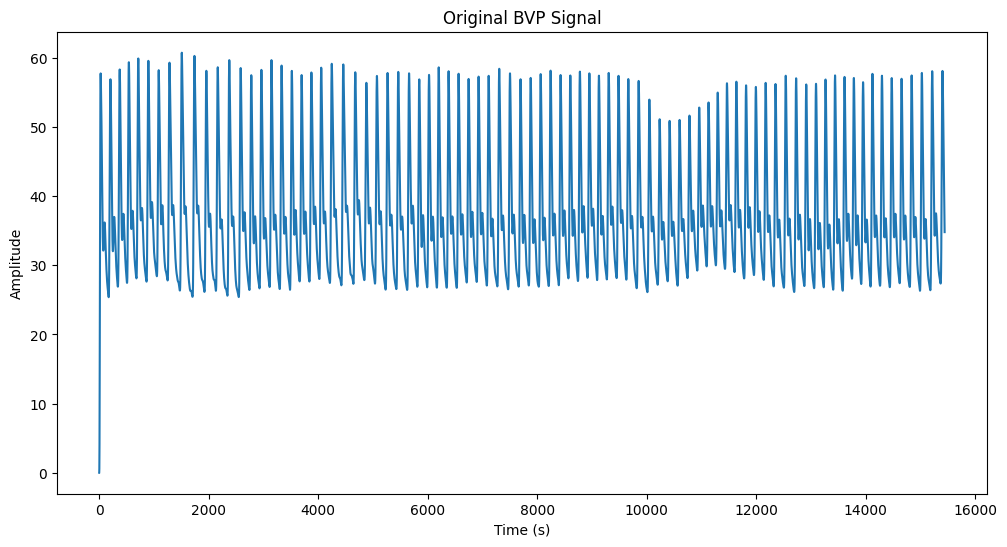

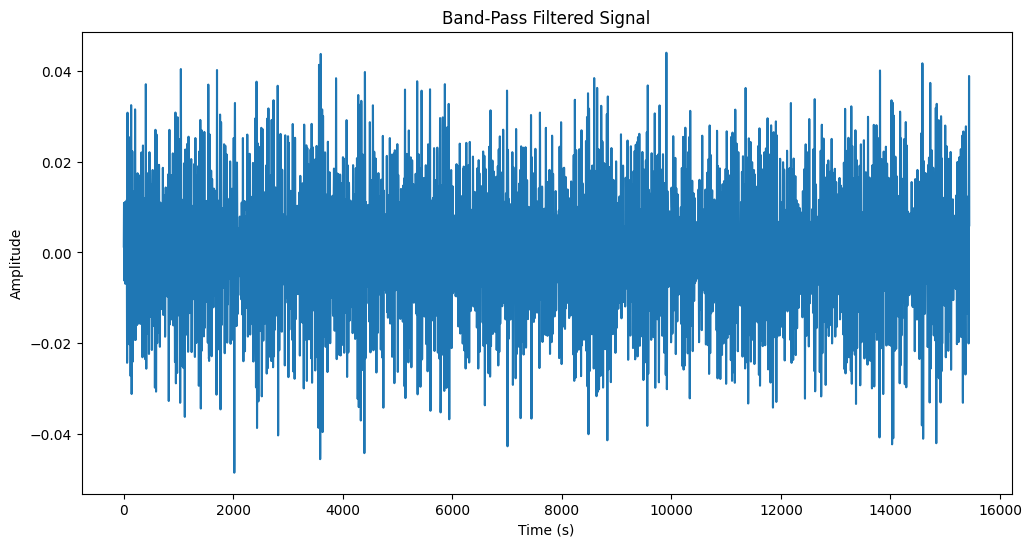

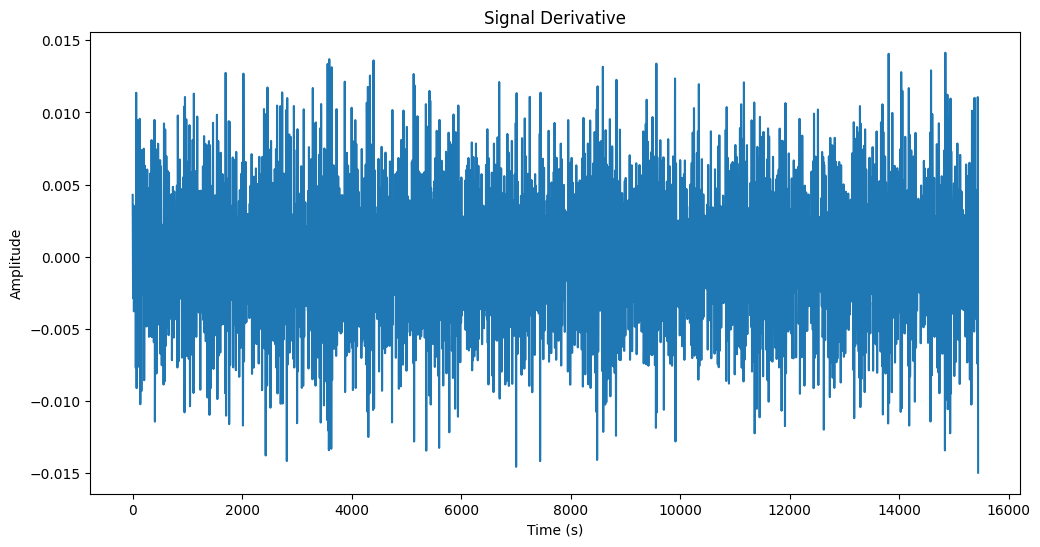

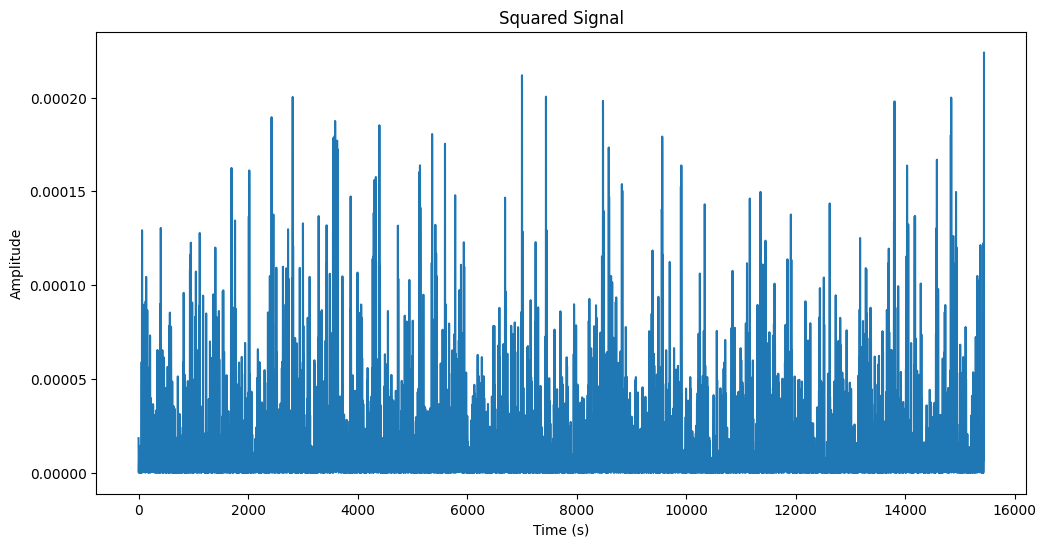

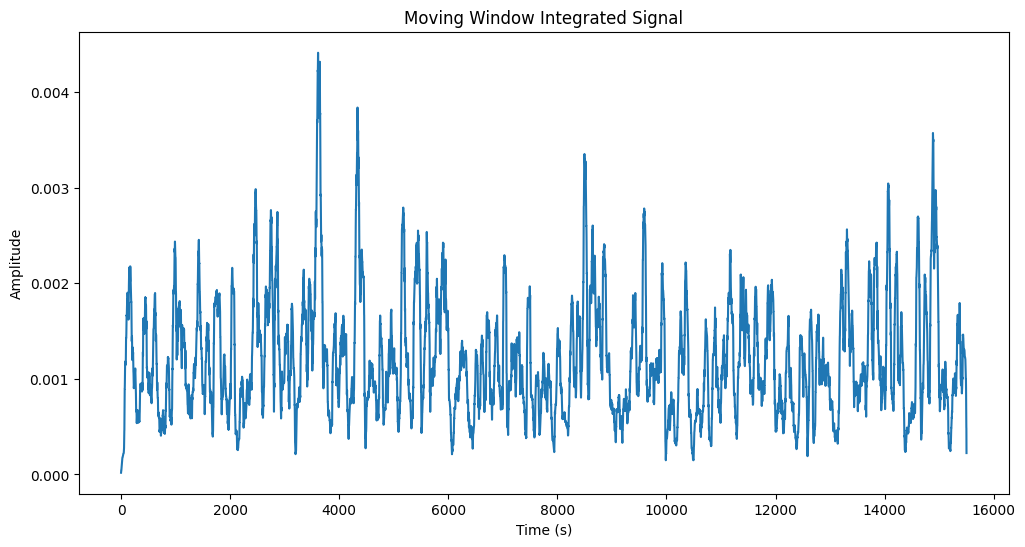

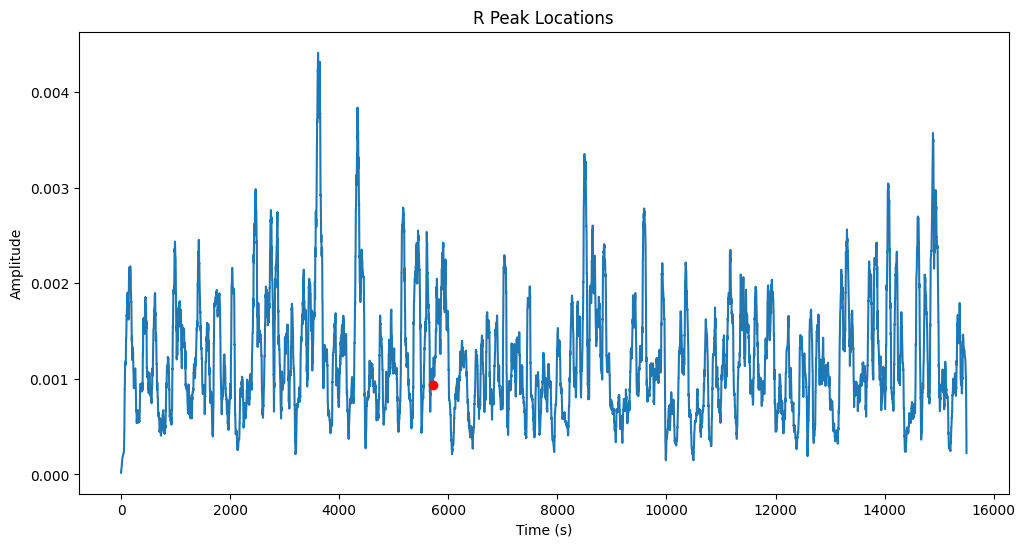

In [131]:
# plot original ECG signal
plt.figure(figsize=(12,6))
plt.plot(original_pulse)
plt.title("Original BVP Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot band-pass filtered signal
plt.figure(figsize=(12,6))
plt.plot(filtered)
plt.title("Band-Pass Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot derivative of signal
plt.figure(figsize=(12,6))
plt.plot(derivative)
plt.title("Signal Derivative")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot squared derivative of signal
plt.figure(figsize=(12,6))
plt.plot(squared)
plt.title("Squared Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot moving window integrated signal
plt.figure(figsize=(12,6))
plt.plot(integrated)
plt.title("Moving Window Integrated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot R peak locations
plt.figure(figsize=(12,6))
plt.plot(integrated)
plt.plot(r_peaks, integrated[r_peaks], 'ro')
plt.title("R Peak Locations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")